In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
base= VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Adding Custom Dense Layer

In [5]:
model = Sequential()

model.add(base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
base.trainable=False

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Data Augmentaion and Labeling

In [13]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/tmp/ipykernel_26/4146946750.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
157/157 [==============================] - 72s 431ms/step - loss: 0.4220 - accuracy: 0.8090 - val_loss: 0.2443 - val_accuracy: 0.8984
Epoch 2/10
157/157 [==============================] - 44s 279ms/step - loss: 0.2897 - accuracy: 0.8716 - val_loss: 0.2511 - val_accuracy: 0.8886
Epoch 3/10
157/157 [==============================] - 43s 274ms/step - loss: 0.2515 - accuracy: 0.8922 - val_loss: 0.1900 - val_accuracy: 0.9218
Epoch 4/10
157/157 [==============================] - 43s 275ms/step - loss: 0.2339 - accuracy: 0.9036 - val_loss: 0.2022 - val_accuracy: 0.9142
Epoch 5/10
157/157 [==============================] - 43s 277ms/step - loss: 0.2440 - accuracy: 0.8972 - val_loss: 0.1562 - val_accuracy: 0.9392
Epoch 6/10
157/157 [==============================] - 43s 275ms/step - loss: 0.2027 - accuracy: 0.9140 - val_loss: 0.1515 - val_accuracy: 0.9424
Epoch 7/10
157/157 [==============================] - 42s 269ms/step - loss: 0.1972 - accuracy: 0.9194 - val_loss: 0.1467 - val_ac

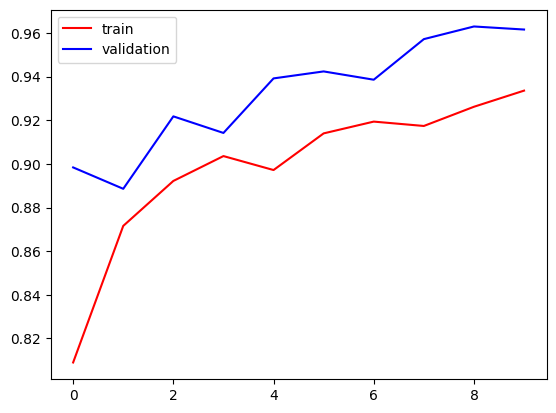

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

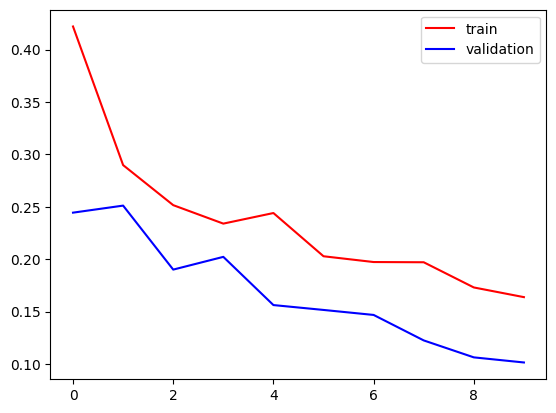

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()